In [1]:
%load_ext autoreload
%autoreload 1
import sys
sys.path.append('..')

In [2]:
from qiskit.providers.fake_provider import FakeJakarta
backend=FakeJakarta()

from simuq.solver import generate_as
from systems.mzmbraiding import qs
from aais.ibm_braiding import mach
from backends.qiskit_braiding import transpile
#from systems.annealing import qs
#from aais.ibm import get_mach
#mach = get_mach(backend)
#from backends.qiskit_pulse_ibm import transpile

In [3]:
from simuq.transformation import JW_transform
new_qs, new_sites = JW_transform(qs)

In [4]:
new_qs.evos[0][0].ham

[(['', '', ''], (9+0j)),
 (['Z', '', ''], (-3+0j)),
 (['', 'Z', ''], (-3+0j)),
 (['', '', 'Z'], (-3+0j)),
 (['Y', 'X', ''], (1-0j)),
 (['Y', 'Z', 'X'], (-1+0j)),
 (['', 'Y', 'X'], (1-0j))]

In [5]:
Trot = 1
tol = 0.1

circ = transpile(backend, *generate_as(new_qs, mach, Trot, 'least_squares', tol))

First round time:  0.025377988815307617
Second round time:  0.0019826889038085938
[(0, 1), (1, 2)]


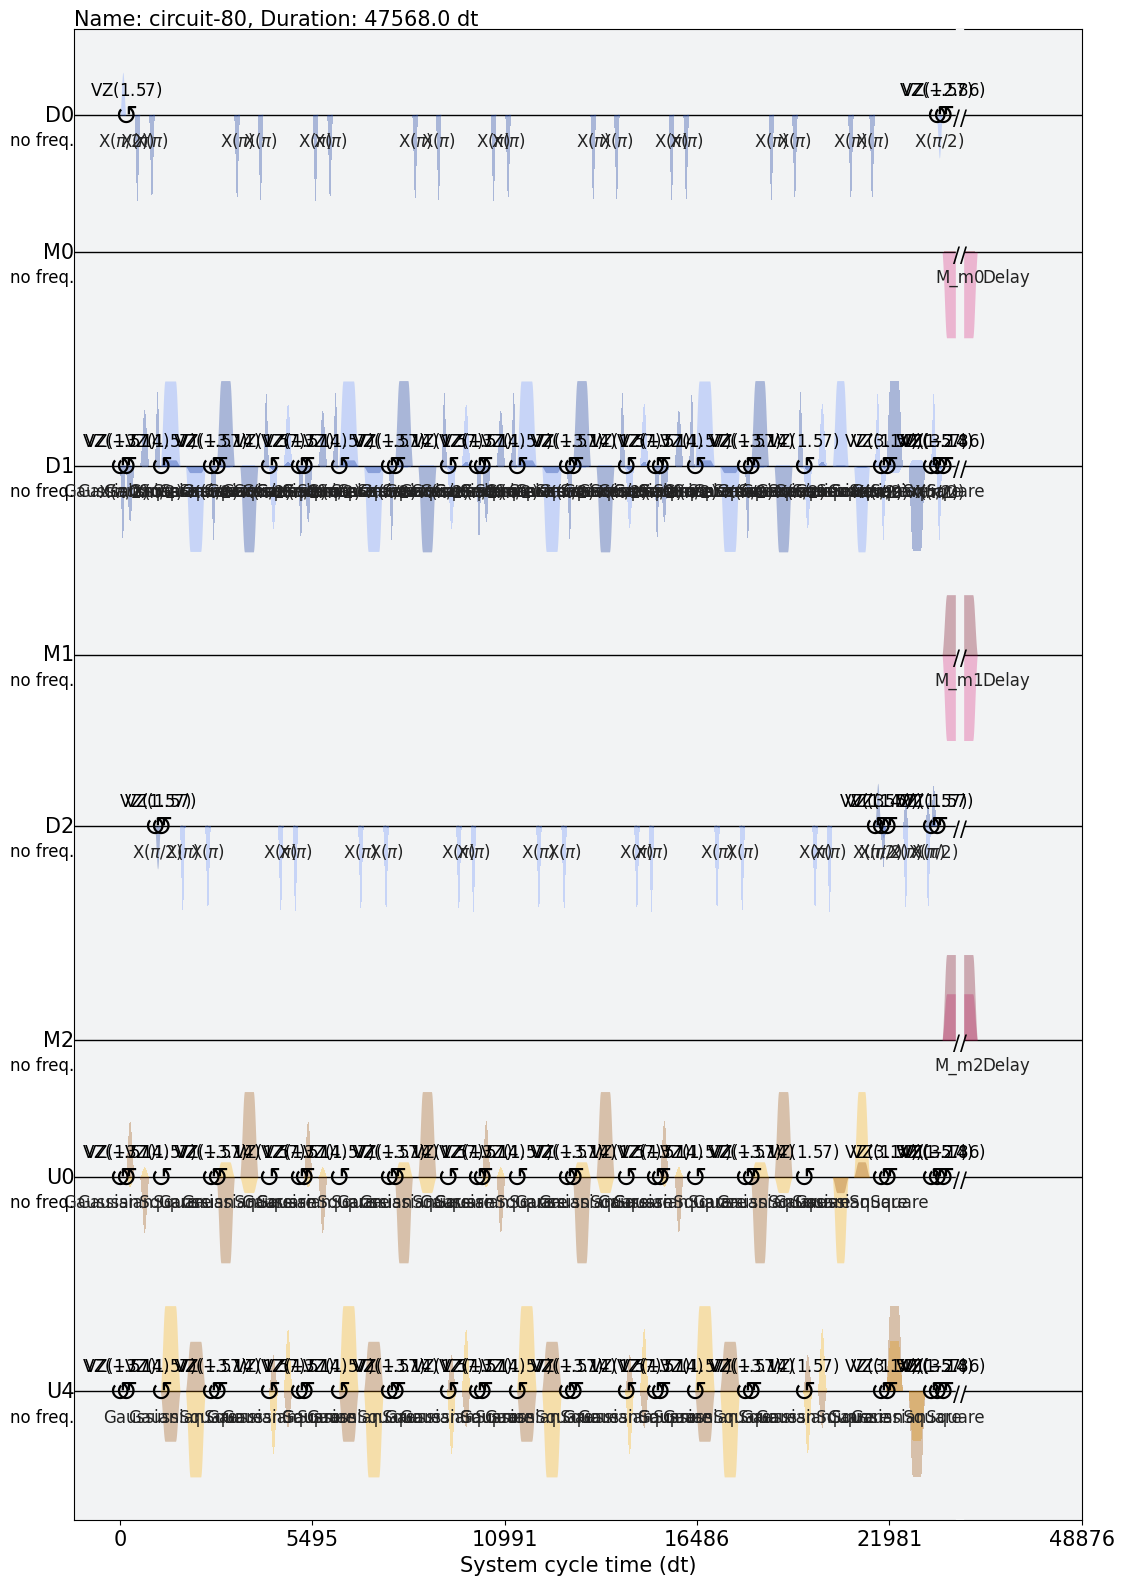

In [6]:
from qiskit import schedule
from qiskit import transpile as ibm_transpile
sch = schedule(ibm_transpile(circ, backend), backend)
sch.draw()